<a href="https://colab.research.google.com/github/Anakha-s/Data-Science/blob/main/covid_sent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
###EDA pkgs
import pandas as pd

In [7]:
#data viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
###hide warning
import warnings
warnings.filterwarnings('ignore')

In [9]:
#load Dataset
df = pd.read_csv("covid19_tweets.csv")

In [10]:
#preview
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


1.text preprocessing
2.sentimental analysis
3.keyword extraction
4.entity extraction

In [11]:
#check columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [12]:
#datatype
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [13]:
#source/value count/distribution of the source
df['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [14]:
#source/value count/distribution of the sources
df['source'].value_counts()

Twitter Web App          56891
Twitter for Android      40179
Twitter for iPhone       35472
TweetDeck                 8543
Hootsuite Inc.            7321
                         ...  
CyberSecDN v.2               1
Maat_Interface               1
Emma Social Connector        1
FPTraffic                    1
www.diolch.wales             1
Name: source, Length: 610, dtype: int64

In [15]:
#plot the top value counts
df['source'].value_counts().nlargest(30)

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
Twitter for iPad            4336
Buffer                      2728
Sprout Social               1833
Instagram                   1759
IFTTT                       1545
dlvr.it                      681
GlobalPandemic.NET           679
LinkedIn                     628
COVID19-Updates              625
Twitter Media Studio         596
WordPress.com                537
HubSpot                      513
Sprinklr                     497
FS Poster                    414
Dynamic Signal               391
Resistbot Open Letters       390
Cheap Bots, Done Quick!      335
Paper.li                     322
Twitter for Advertisers      317
Blood Donors India           281
IAMBLOG2TWITTER              266
Alexander Higgins            225
Zoho Social                  224
The Social Jukebox           216
Fabrik.fm                    209
Name: sour

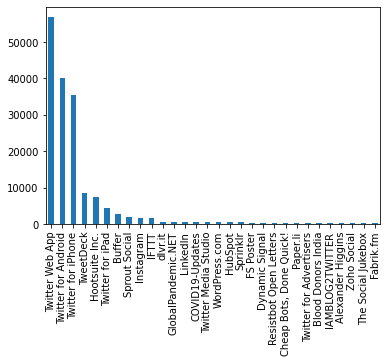

In [16]:
#plot the top value counts
df['source'].value_counts().nlargest(30).plot(kind='bar')

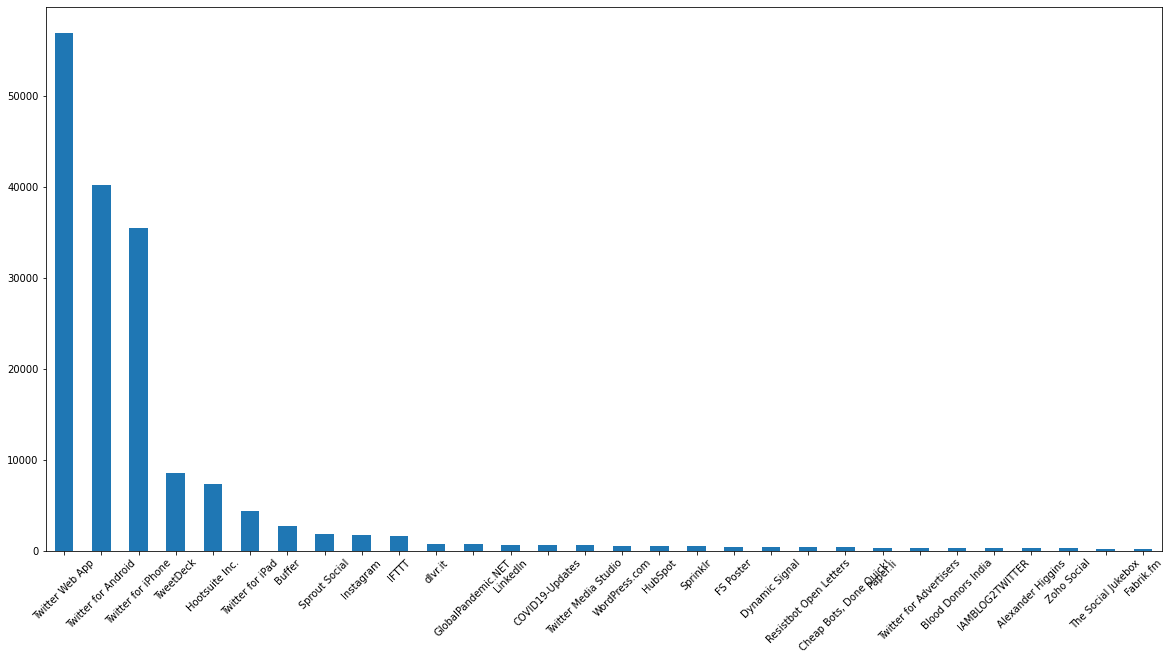

In [17]:
#plot the top value counts
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### text analysis  of tweet

In [18]:
!pip install neattext

     |████████████████████████████████| 114 kB 5.1 MB/s 


In [19]:
#load text cleaning paackage
import neattext.functions as nfx

In [20]:
#method /attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
df['text']

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [22]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

In [ ]:
### noise( remove hashtags/urls/emojis/special char)

In [23]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [24]:
df['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [25]:
df['extracted_hashtags']=df['text'].apply(nfx.extract_hashtags)

In [26]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,[#WearAMask],['WearAMask']
179104,[#COVID19],['COVID19']
179105,[],NaN
179106,[#COVID19],['COVID19']


In [27]:
##cleaning text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [28]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [29]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [30]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challen...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a t...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [31]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from \n      cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [35]:
#cleaning text: remove multiple white spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [33]:
df['clean_tweet'].iloc[10]

'49K+ Covid19 cases still no response from cancel the compartment exa… https://t.co/kV2ZKmumu1'

In [34]:
#cleaning text:remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [36]:
#cleaning text:remove punctions
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_punctuations)

In [37]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


In [ ]:
###sentimental Analysis

In [38]:
from textblob import TextBlob

In [44]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity':sentiment_polarity,
            'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result

In [45]:
#Text
ex1=df['clean_tweet'].iloc[0]

In [46]:
get_sentiment(ex1)

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [47]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [48]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [49]:
df['sentiment_results'].iloc[0]

{'polarity': -0.25, 'sentiment': 'Negative', 'subjectivity': 0.25}

In [50]:
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,Negative


In [52]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [53]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [54]:
df['sentiment'].value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: sentiment, dtype: int64

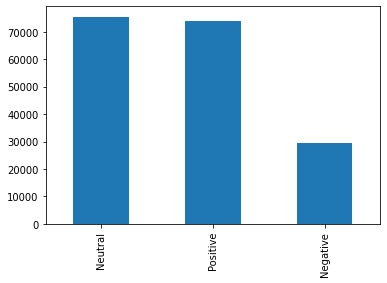

In [55]:
df['sentiment'].value_counts().plot(kind='bar')

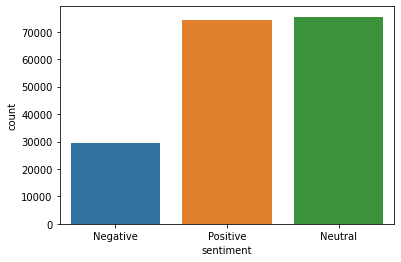

In [56]:
#plot with seaborn
sns.countplot(df['sentiment'])

In [ ]:
### Keyword extraction
###for +ve & -ve also for general

In [57]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [58]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']

In [59]:
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [68]:
positive_tweet

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

In [74]:
##remove stowords and convert to tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()


AttributeError: ignored

In [75]:
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [76]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()

In [77]:
positive_tweet_list

NameError: ignored

In [78]:
#tokenization
for line in positive_tweet_list:
  print(line)
  for tokens in line.split():
    print(token)

NameError: ignored

In [80]:
pos_tokens =[token for line in positive_tweet_list for token in line.split()]

NameError: ignored

In [79]:
neg_tokens =[token for line in negative_tweet_list for token in line.split()]

In [81]:
neu_tokens =[token for line in neutral_tweet_list for token in line.split()]